# 3. 아동학대 발생률과 관련이 있는 요인

## 관련요인
1. 범죄발생 지역 (2018-2021)
2. 시∙군∙구별 고위험음주율 (2018-2021)
3. 행정구역 시도별 경제활동인구 (2018-2021)
- 출처 : 아동학대 발생률에 영향을 미치는 요인: 공공데이터를 활용한 중․거시적 관점을 중심으로 - 황유리, 김광혁 (전주대학교) 
    - https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002630082

## 가설
- 아동학대 관련 요인
1. 시도별 범죄발생률의 발생 정도와 아동학대 비율은 관련이 있을 것이다.
2. 시도별 고위험음주율의 정도와 아동학대 비율은 관련이 있을 것이다.
3. 시도별 비경제활동인구수와 아동학대 비율은 관련이 있을 것이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 1. 범죄발생 지역 (2018-2021)

- 시도별 범죄발생률의 발생 정도와 아동학대 비율은 관련이 있을 것이다.

In [4]:
crime = pd.read_csv('./data/범죄발생_지역_2018_2021.csv',
                   encoding = 'cp949',
                   low_memory = False)

# 5대 강력범죄 : 살인, 강도, 강간/추행(성폭력), 절도, 폭행에 대해서만 다루도록 한다.

# 컬럼 변경
crime.columns = crime.iloc[1]

# 발생지역별(1) 행 2개 삭제 후, 5대 강력범죄 컬럼만 추출

# - 행 2개 삭제
crime.drop([0,1,2,3,4,5], axis=0, inplace=True)

# - 5대 강력범죄 컬럼 추출
crime = crime[['발생지역별(1)', '시점', '살인', '강도', '성폭력', '절도', '폭행']]

# index 재설정
crime = crime.set_index('발생지역별(1)', drop=False)
crime.drop(['발생지역별(1)'], axis=1, inplace=True)
# crime

# 평균 열 추가
crime.replace('-', 0, inplace=True)
crime = crime.astype('int')
crime['평균'] = crime.mean(axis=1)
crime['평균'] = round(crime['평균'])
crime.head()

# set(crime.index)  # 발생지역
# len(set(crime.index))  # 17개 지역

1,시점,살인,강도,성폭력,절도,폭행,평균
발생지역별(1),,,,,,,
서울,2018,150,145,9388,39306,35525,14422.0
서울,2019,160,157,9370,42362,34070,14690.0
서울,2020,168,143,8285,38414,28699,12955.0
서울,2021,130,125,8459,33639,24030,11401.0
부산,2018,55,87,2012,14464,10802,4906.0


In [5]:
c2018 = crime[crime['시점']==2018]  # 2018
c2018.head()

c2019 = crime[crime['시점']==2019]  # 2019

c2020 = crime[crime['시점']==2020]  # 2020

c2021 = crime[crime['시점']==2021]  # 2021

In [6]:
# 연도별 아동학대 의심사례
year18 = pd.read_csv('./data/2018년도 아동학대 의심사례.csv',
                   encoding = 'utf-8',
                   low_memory = False)
year19 = pd.read_csv('./data/2019년도 아동학대 의심사례.csv',
                   encoding = 'utf-8',
                   low_memory = False)
year20 = pd.read_csv('./data/2020년도 아동학대 의심사례.csv',
                   encoding = 'utf-8',
                   low_memory = False)
year21 = pd.read_csv('./data/2021년도 아동학대 의심사례.csv',
                   encoding = 'utf-8',
                   low_memory = False)

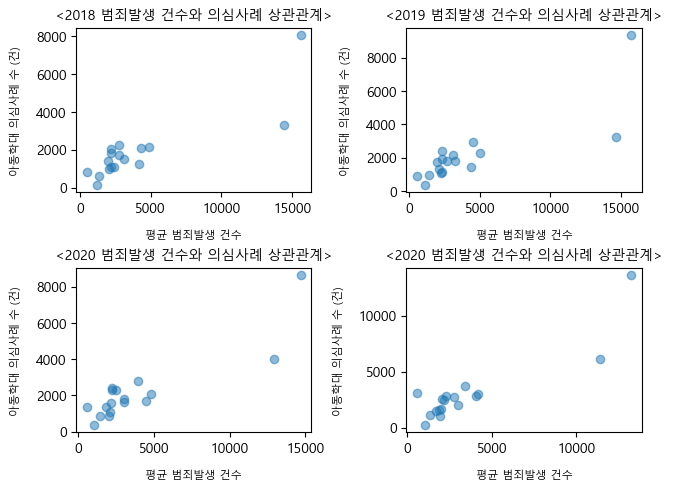

In [7]:
# 연도별 범죄발생 건수 - 아동학대 의심사례 상관관계 분석
x18 = c2018['평균'].values
y18 = year18['아동학대 의심사례'].values

x19 = c2019['평균'].values
y19 = year19['아동학대 의심사례'].values

x20 = c2020['평균'].values
y20 = year20['아동학대 의심사례'].values

x21 = c2021['평균'].values
y21 = year21['아동학대 의심사례'].values

# 그래프 겹치지 않게 하기
plt.subplots(constrained_layout=True)

# 2018년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(221)
plt.title('<2018 범죄발생 건수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('평균 범죄발생 건수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x18, y18, alpha=0.5)  # 양의 상관관계가 보인다.

# 2019년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(222)
plt.title('<2019 범죄발생 건수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('평균 범죄발생 건수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x19, y19, alpha=0.5)

# 2020년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(223)
plt.title('<2020 범죄발생 건수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('평균 범죄발생 건수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x20, y20, alpha=0.5)

# 2021년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(224)
plt.title('<2020 범죄발생 건수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('평균 범죄발생 건수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x21, y21, alpha=0.5)

In [8]:
# 상관계수
print(np.corrcoef(x18, y18)[0, 1])
print(np.corrcoef(x19, y19)[0, 1])
print(np.corrcoef(x20, y20)[0, 1])
print(np.corrcoef(x21, y21)[0, 1])

0.8633264855561409
0.8346564524638167
0.8868350977446203
0.8987858527857506


### 1) 결론
- 상관계수는 -1에서 1 사이의 값을 가진다.
    - 0인 경우 : 두 변수 간에 선형관계가 전혀 없다.
    - 0.3 ~ 0.7 : 비교적 뚜렷한 양의 상관관계를 보인다.
    - 0.7 ~ 1.0 : 강한 양의 상관관계를 보인다.

- 즉, 연도별 범죄발생 건수와 아동학대 의심사례는 모두 0.8 이상의 상관계수 값을 가지므로 강한 양의 상관관계를 보인다고 할 수 있다. 이는 그래프를 통해서도 확인할 수 있다.
- 위의 결과를 토대로 범죄발생 건수가 아동학대 의심사례를 원인으로 유추해 볼 만하다고 할 수 있다.

### 2. 시∙군∙구별 고위험음주율 (2018-2021)

- 시도별 고위험음주율 정도와 아동학대 비율은 관련이 있을 것이다.

In [9]:
high_risk = pd.read_csv('./data/시·군·구별_고위험음주율_2018_2021.csv',
                                encoding = 'cp949',
                                low_memory = False)
high_risk = high_risk[high_risk['시군구별(2)']=='소계']
high_risk.head()

,시군구별(1),시군구별(2),시군구별(3),시점,응답자수 (명),조율 (%),조율표준오차,표준화율 (%),표준화율표준오차
0,서울특별시,소계,소계,2018,22900,13.0,0.3,13.8,0.3
1,서울특별시,소계,소계,2019,22925,12.6,0.3,13.5,0.3
2,서울특별시,소계,소계,2020,22907,8.9,0.2,9.6,0.2
3,서울특별시,소계,소계,2021,22919,8.3,0.2,9.1,0.2
104,부산광역시,소계,소계,2018,14515,15.7,0.4,17.2,0.4


In [10]:
high_risk['고위험'] = round(high_risk['응답자수 (명)']*high_risk['조율 (%)'] / 100)
high_risk = high_risk[['시군구별(1)', '시점', '응답자수 (명)', '고위험']]
high_risk = high_risk.astype({'고위험': 'int'})
high_risk.head()

,시군구별(1),시점,응답자수 (명),고위험
0,서울특별시,2018,22900,2977
1,서울특별시,2019,22925,2889
2,서울특별시,2020,22907,2039
3,서울특별시,2021,22919,1902
104,부산광역시,2018,14515,2279


In [11]:
h18 = high_risk[high_risk['시점']==2018]
h19 = high_risk[high_risk['시점']==2019]
h20 = high_risk[high_risk['시점']==2020]
h21 = high_risk[high_risk['시점']==2021]

In [12]:
# 연도별 고위험음주율 - 아동학대 의심사례 상관관계 분석
x18 = h18['고위험'].values
y18 = year18['아동학대 의심사례'].values

x19 = h19['고위험'].values
y19 = year19['아동학대 의심사례'].values

x20 = h20['고위험'].values
y20 = year20['아동학대 의심사례'].values

x21 = h21['고위험'].values
y21 = year21['아동학대 의심사례'].values

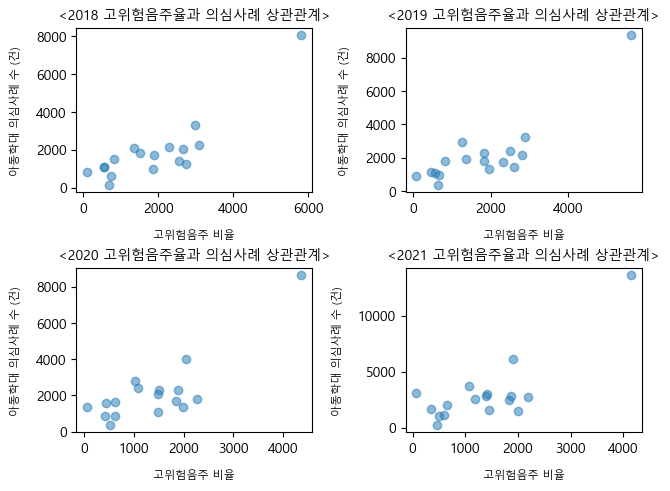

In [13]:
# 그래프 겹치지 않게 하기
plt.subplots(constrained_layout=True)

# 2018년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(221)
plt.title('<2018 고위험음주율과 의심사례 상관관계>', fontsize=10)
plt.xlabel('고위험음주 비율', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x18, y18, alpha=0.5)

# 2019년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(222)
plt.title('<2019 고위험음주율과 의심사례 상관관계>', fontsize=10)
plt.xlabel('고위험음주 비율', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x19, y19, alpha=0.5)

# 2020년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(223)
plt.title('<2020 고위험음주율과 의심사례 상관관계>', fontsize=10)
plt.xlabel('고위험음주 비율', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x20, y20, alpha=0.5)

# 2021년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(224)
plt.title('<2021 고위험음주율과 의심사례 상관관계>', fontsize=10)
plt.xlabel('고위험음주 비율', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x21, y21, alpha=0.5)

In [14]:
# 상관계수
print(np.corrcoef(x18, y18)[0, 1])
print(np.corrcoef(x19, y19)[0, 1])
print(np.corrcoef(x20, y20)[0, 1])
print(np.corrcoef(x21, y21)[0, 1])

0.8571873897160164
0.8499377733990137
0.8177653543097267
0.7882841408470954


### 2) 결론
- 연도별 고위험음주비율과 아동학대 의심사례는 모두 0.7 이상의 상관계수 값을 가지므로 강한 양의 상관관계를 보인다고 할 수 있다. 이는 그래프를 통해서도 확인할 수 있다.
- 위의 결과를 토대로 고위험음주율을 아동학대 의심사례를 원인으로 유추해 볼 만하다고 할 수 있다.

### 3. 행정구역 시도별 경제활동인구 (2018-2021)

- 시도별 비경제활동인구수와 아동학대 비율은 관련이 있을 것이다.

In [15]:
economy = pd.read_csv('./data/행정구역_시도_별_경제활동인구_2018_2021.csv',
                               encoding = 'cp949',
                               low_memory = False)

economy = economy[economy['시도별'] != '계']
economy.head()

,시도별,시점,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),15-64세 고용률 (%)
4,서울특별시,2018,8521,5335,5080,254,3186,62.6,4.8,59.6,66.0
5,서울특별시,2019,8478,5319,5086,233,3159,62.7,4.4,60.0,66.3
6,서울특별시,2020,8516,5293,5051,241,3223,62.1,4.6,59.3,65.9
7,서울특별시,2021,8533,5312,5055,257,3221,62.3,4.8,59.2,66.6
8,부산광역시,2018,2975,1729,1657,71,1247,58.1,4.1,55.7,62.9


In [16]:
e18 = economy[economy['시점']==2018]
e19 = economy[economy['시점']==2019]
e20 = economy[economy['시점']==2020]
e21 = economy[economy['시점']==2021]

In [17]:
# 연도별 비경제활동인구 - 아동학대 의심사례 상관관계 분석
x18 = e18['비경제활동인구 (천명)'].values
y18 = year18['아동학대 의심사례'].values

x19 = e19['비경제활동인구 (천명)'].values
y19 = year19['아동학대 의심사례'].values

x20 = e20['비경제활동인구 (천명)'].values
y20 = year20['아동학대 의심사례'].values

x21 = e21['비경제활동인구 (천명)'].values
y21 = year21['아동학대 의심사례'].values

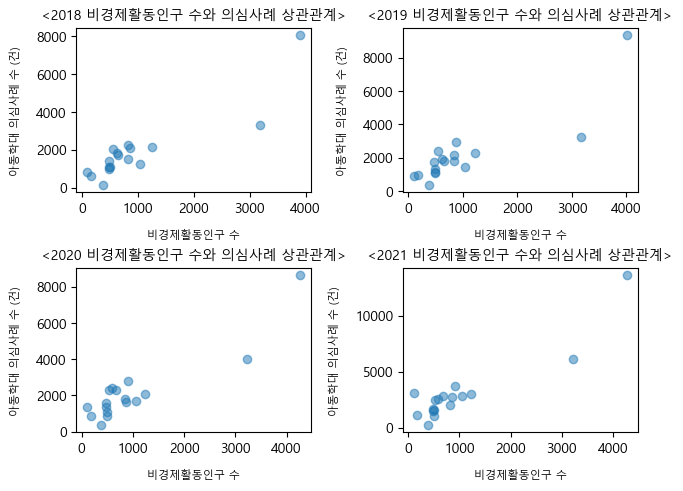

In [18]:
# 그래프 겹치지 않게 하기
plt.subplots(constrained_layout=True)

# 2018년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(221)
plt.title('<2018 비경제활동인구 수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('비경제활동인구 수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x18, y18, alpha=0.5)

# 2019년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(222)
plt.title('<2019 비경제활동인구 수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('비경제활동인구 수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x19, y19, alpha=0.5)

# 2020년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(223)
plt.title('<2020 비경제활동인구 수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('비경제활동인구 수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x20, y20, alpha=0.5)

# 2021년도 범죄발생 건수와 아동학대 의심사례 상관관계
plt.subplot(224)
plt.title('<2021 비경제활동인구 수와 의심사례 상관관계>', fontsize=10)
plt.xlabel('비경제활동인구 수', labelpad=10, fontsize=8)
plt.ylabel('아동학대 의심사례 수 (건)', labelpad=10, fontsize=8)
plt.scatter(x21, y21, alpha=0.5)

In [19]:
# 상관계수
print(np.corrcoef(x18, y18)[0, 1])
print(np.corrcoef(x19, y19)[0, 1])
print(np.corrcoef(x20, y20)[0, 1])
print(np.corrcoef(x21, y21)[0, 1])

0.8964060699978417
0.8768415849872316
0.9150018286763096
0.9220150311694916


### 3) 결론 
- 연도별 비경제활동인구 수와 아동학대 의심사례는 모두 0.8 이상의 상관계수 값을 가지므로 강한 양의 상관관계를 보인다고 할 수 있다. 이는 그래프를 통해서도 확인할 수 있다.
- 위의 결과를 토대로 비경제활동인구를 아동학대 의심사례를 원인으로 유추해 볼 만하다고 할 수 있다.

### 최종 결론
- 위의 세 가지 요인 모두 아동학대 의심사례와 관련하여 최소 0.75 이상의 상관계수 값을 가지므로, 상관성이 매우 높음을 확인할 수 있다.
- 추후에 이러한 요인들이 아동학대 발생 여부의 원인이 될 수 있는지 인과관계를 파악해 볼 필요가 있는 것으로 보인다.